# Principal Component Analysis

- 真實資料的特徵是非常多維度的，如何找到影響力大，或是最能解釋變異關係的特徵(最大變異數)，這種技術就顯得分常重要。
<br><br>
- 我們其實在做資料前處理的時候，就是討論特徵之間的關係，特徵與label的關係，但是因為往往真實的資料，特徵值的維度是非常的多的，此時用視覺化的方式也不會較為清楚，因此採取PCA方式
<br><br>
- PCA : 找到這些特徵關係中，先找到幾個「 主要 」最能夠解釋或影響資料變異的特徵，作為新特徵維度，並透過這些維度，先行訓練，
<br><br>
- 所以概念就很像是dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer

In [2]:
df=load_breast_cancer()

In [3]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
data=pd.DataFrame(data=df["data"],columns=df["feature_names"])

In [5]:
data.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(data)
feature_data=scaler.transform(data)

# PCA
- from sklearn.decomposition import PCA

In [9]:
# PCA
from sklearn.decomposition import PCA

In [10]:
# 找到兩個主要的component
pca=PCA(n_components=2)

In [11]:
#PCA
pca.fit(feature_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(feature_data)

In [13]:
# 未使用 PCA 資料的維度
feature_data.shape

(569, 30)

In [14]:
# 使用PCA後 資料的維度
x_pca.shape

(569, 2)

In [15]:
pd.options.display.max_columns=30

In [16]:
#這些搜出來的特徵值就是從多的維度當中挑選出來最有影響力的特徵
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [17]:
x_pca[:,1]

array([ 1.94858307e+00, -3.76817174e+00, -1.07517380e+00,  1.02755891e+01,
       -1.94807157e+00,  3.94992890e+00, -2.69003128e+00,  2.34024401e+00,
        3.39181295e+00,  7.72717407e+00, -2.65927550e+00,  6.65679266e-02,
        2.70097649e+00, -9.68279261e-01,  4.86108331e+00,  2.97706118e+00,
       -1.56475773e+00,  1.41867033e+00, -4.11433352e+00, -1.88214954e-01,
        5.72808193e-01,  1.66294990e+00,  3.30496373e+00, -5.12836651e+00,
       -1.54375229e+00,  2.01861034e+00,  2.17162512e+00, -1.87655235e+00,
        5.37242161e-01, -1.52370502e+00, -7.57177451e-01,  4.00529551e+00,
        3.37536154e-01, -1.13258891e+00,  7.58423243e-01, -3.54355942e-01,
        9.13196276e-01, -1.41347312e+00, -3.35129292e+00,  8.86243953e-01,
       -1.92399162e+00,  2.26075201e+00,  2.01867310e+00,  9.84930020e-01,
       -1.37099091e-01, -1.34876978e-01,  1.48422032e+00,  2.35227179e+00,
        9.58296095e-02, -1.20843321e+00, -1.28249558e+00, -1.68895860e+00,
       -4.98218714e-01, -

Text(0,0.5,'Second Component')

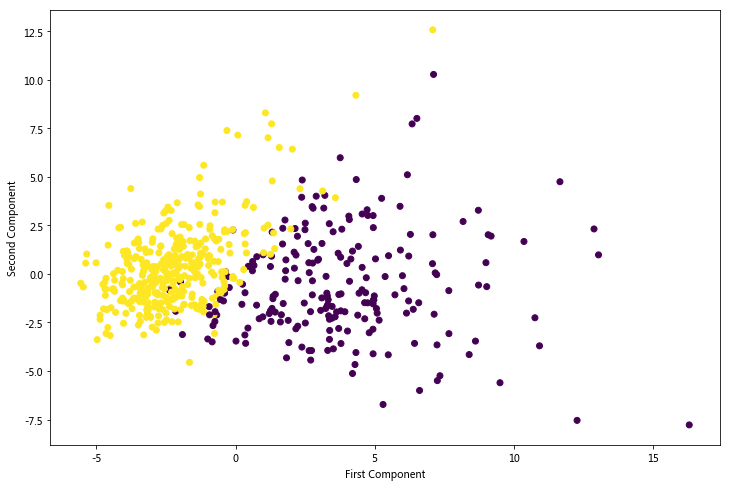

In [18]:
plt.figure(figsize=(12,8))

#很重要的，透過圖表c(代表targert)，證明我們經過PCA所挑選的特徵是否能有效的將target分類，若可以有效分類，代表這兩個特徵有很大的影響力
plt.scatter(x_pca[:,0],x_pca[:,1],c=df["target"])

plt.xlabel("First Component")
plt.ylabel("Second Component")
#plt.xlim([-20,10])

In [19]:
x_pca[:,0].mean()

9.990056038806329e-17

In [20]:
# each row represent the principal component
# each column represent the relation between feature and original feature
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [21]:
df_df=pd.DataFrame(data=pca.components_,columns=df["feature_names"])

In [27]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [29]:
pca.explained_variance_  

array([13.30499079,  5.7013746 ])

In [23]:
df_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


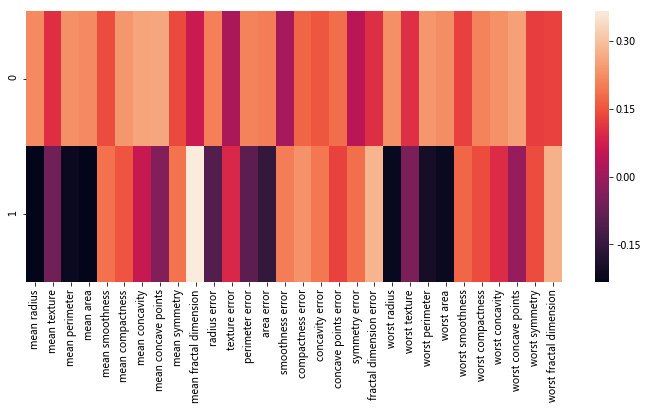

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(df_df)

In [34]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])